In [1]:
import os
import numpy as np
import typing
import pandas as pd
import keras
import matplotlib
from matplotlib import pyplot
from keras import applications, models, layers
# import scipy
from PIL import Image
import scipy.misc

from scipy.sparse.csgraph import connected_components
from scipy import ndimage

from skimage import feature
from scipy import ndimage as ndi

from skimage.filters import roberts,sobel,scharr,prewitt

Using TensorFlow backend.
/local/projects/python3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
os.chdir('/research/rih-cs/datasets/elvo-multiphase')

In [3]:
def crop_image(arr,dim):
    num_rows = arr.shape[0]
    num_cols = arr.shape[1]
    
    start_row = int((num_rows-dim)/2)
    end_row = start_row+dim
    
    start_col = int((num_cols-dim)/2)
    end_col = start_col+dim

    cropped = arr[start_row:end_row,start_col:end_col]
    assert(cropped.shape[0]==dim)
    assert(cropped.shape[1]==dim)
    return cropped

In [4]:
def scale_image(arr,scale_factor):
    
    resized = scipy.misc.imresize(arr,scale_factor,'nearest')
    return resized

In [9]:
def load_data(data_dir: str,dim: int, resize_factor: int, write_dir: str):
    
    data_dict = {}

    for subdir, dirs, files in os.walk(data_dir):
#         print(dirs)
#         for directory in dirs:
#             print(directory)
#             for filename in os.listdir(directory):
#                 print(filename)
        print(subdir)

        name = subdir[:-13]
       
        name = name[18:]
        
        if name is '':
            continue;
            
        arr_3D = np.zeros((3,dim,dim))
        print('name is: '+name)

        for file in files:
            
#             print(file)
#             print(file[:-10])
            if file.endswith('.npy'):
#                 print(subdir)
                
                patient_id = subdir+'/'+file
                arr = np.load(patient_id)
#                 arr = scipy.misc.imread(patient_id,True,'F');
                scaled = scale_image(arr,resize_factor)
                cropped = crop_image(scaled,dim)
                idx = file[-5]
                idx = int(idx)-1
                arr_3D[idx,:,:] = cropped
                
                #shrink by 20%
                
#                 print(patient_id)
#                 print(idx)
#                 print(arr.shape)
#                 print(np.max(cropped))
#                 print(np.max(arr_3D[idx,:,:]))

        arr_3D = np.transpose(arr_3D,(1,2,0))
        data_dict[name] = arr_3D
        fname = write_dir+'/'+name+'.npy'
        print(fname)
        np.save(fname,arr_3D)
        print(np.max(arr_3D[0,:,:]))
        print(np.max(arr_3D[1,:,:]))
        print(np.max(arr_3D[2,:,:]))
        print(arr_3D.shape)

        print('setting: '+name+' in dictionary')
        
#             return data_dict
            
    return data_dict
                
            
 

In [10]:
!pwd
directory = '/research/rih-cs/datasets/elvo-multiphase/224_processed'
data_dir = load_data('segmentation_data',224,0.7,directory)

/gpfs/main/research/rih-cs/datasets/elvo-multiphase
segmentation_data
segmentation_data/N136_preprocessed
name is: N136
/research/rih-cs/datasets/elvo-multiphase/224_processed/N136.npy


/gpfs/main/home/jvasque1/elvo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


213.0
194.0
209.0
(224, 224, 3)
setting: N136 in dictionary
segmentation_data/N16_preprocessed
name is: N16
/research/rih-cs/datasets/elvo-multiphase/224_processed/N16.npy
222.0
152.0
154.0
(224, 224, 3)
setting: N16 in dictionary
segmentation_data/N128_preprocessed
name is: N128
/research/rih-cs/datasets/elvo-multiphase/224_processed/N128.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N128 in dictionary
segmentation_data/N126_preprocessed
name is: N126
/research/rih-cs/datasets/elvo-multiphase/224_processed/N126.npy
220.0
220.0
228.0
(224, 224, 3)
setting: N126 in dictionary
segmentation_data/N163_preprocessed
name is: N163
/research/rih-cs/datasets/elvo-multiphase/224_processed/N163.npy
198.0
221.0
235.0
(224, 224, 3)
setting: N163 in dictionary
segmentation_data/N195_preprocessed
name is: N195
/research/rih-cs/datasets/elvo-multiphase/224_processed/N195.npy
194.0
211.0
217.0
(224, 224, 3)
setting: N195 in dictionary
segmentation_data/N111_preprocessed
name is: N111
/research/rih-cs/datasets

194.0
238.0
211.0
(224, 224, 3)
setting: N121 in dictionary
segmentation_data/N193_preprocessed
name is: N193
/research/rih-cs/datasets/elvo-multiphase/224_processed/N193.npy
240.0
243.0
222.0
(224, 224, 3)
setting: N193 in dictionary
segmentation_data/N139_preprocessed
name is: N139
/research/rih-cs/datasets/elvo-multiphase/224_processed/N139.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N139 in dictionary
segmentation_data/N17_preprocessed
name is: N17
/research/rih-cs/datasets/elvo-multiphase/224_processed/N17.npy
205.0
239.0
236.0
(224, 224, 3)
setting: N17 in dictionary
segmentation_data/N138_preprocessed
name is: N138
/research/rih-cs/datasets/elvo-multiphase/224_processed/N138.npy
201.0
152.0
186.0
(224, 224, 3)
setting: N138 in dictionary
segmentation_data/N114_preprocessed
name is: N114
/research/rih-cs/datasets/elvo-multiphase/224_processed/N114.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N114 in dictionary
segmentation_data/N118_preprocessed
name is: N118
/research/rih-cs/datasets/elvo-

/research/rih-cs/datasets/elvo-multiphase/224_processed/N2.npy
239.0
227.0
249.0
(224, 224, 3)
setting: N2 in dictionary
segmentation_data/N197_preprocessed
name is: N197
/research/rih-cs/datasets/elvo-multiphase/224_processed/N197.npy
209.0
225.0
236.0
(224, 224, 3)
setting: N197 in dictionary
segmentation_data/N268_preprocessed
name is: N268
/research/rih-cs/datasets/elvo-multiphase/224_processed/N268.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N268 in dictionary
segmentation_data/N133_preprocessed
name is: N133
/research/rih-cs/datasets/elvo-multiphase/224_processed/N133.npy
231.0
243.0
247.0
(224, 224, 3)
setting: N133 in dictionary
segmentation_data/N127_preprocessed
name is: N127
/research/rih-cs/datasets/elvo-multiphase/224_processed/N127.npy
222.0
197.0
208.0
(224, 224, 3)
setting: N127 in dictionary
segmentation_data/N12_preprocessed
name is: N12
/research/rih-cs/datasets/elvo-multiphase/224_processed/N12.npy
215.0
193.0
255.0
(224, 224, 3)
setting: N12 in dictionary
segmentation_d

227.0
235.0
242.0
(224, 224, 3)
setting: N224 in dictionary
segmentation_data/N230_preprocessed
name is: N230
/research/rih-cs/datasets/elvo-multiphase/224_processed/N230.npy
191.0
185.0
224.0
(224, 224, 3)
setting: N230 in dictionary
segmentation_data/N250_preprocessed
name is: N250
/research/rih-cs/datasets/elvo-multiphase/224_processed/N250.npy
161.0
0.0
151.0
(224, 224, 3)
setting: N250 in dictionary
segmentation_data/N210_preprocessed
name is: N210
/research/rih-cs/datasets/elvo-multiphase/224_processed/N210.npy
77.0
177.0
168.0
(224, 224, 3)
setting: N210 in dictionary
segmentation_data/N258_preprocessed
name is: N258
/research/rih-cs/datasets/elvo-multiphase/224_processed/N258.npy
231.0
221.0
192.0
(224, 224, 3)
setting: N258 in dictionary
segmentation_data/N208_preprocessed
name is: N208
/research/rih-cs/datasets/elvo-multiphase/224_processed/N208.npy
233.0
233.0
236.0
(224, 224, 3)
setting: N208 in dictionary
segmentation_data/N201_preprocessed
name is: N201
/research/rih-cs/d

166.0
209.0
219.0
(224, 224, 3)
setting: N313 in dictionary
segmentation_data/N325_preprocessed
name is: N325
/research/rih-cs/datasets/elvo-multiphase/224_processed/N325.npy
222.0
223.0
223.0
(224, 224, 3)
setting: N325 in dictionary
segmentation_data/N289_preprocessed
name is: N289
/research/rih-cs/datasets/elvo-multiphase/224_processed/N289.npy
239.0
253.0
243.0
(224, 224, 3)
setting: N289 in dictionary
segmentation_data/N321_preprocessed
name is: N321
/research/rih-cs/datasets/elvo-multiphase/224_processed/N321.npy
231.0
254.0
235.0
(224, 224, 3)
setting: N321 in dictionary
segmentation_data/N288_preprocessed
name is: N288
/research/rih-cs/datasets/elvo-multiphase/224_processed/N288.npy
199.0
229.0
213.0
(224, 224, 3)
setting: N288 in dictionary
segmentation_data/N284_preprocessed
name is: N284
/research/rih-cs/datasets/elvo-multiphase/224_processed/N284.npy
186.0
189.0
173.0
(224, 224, 3)
setting: N284 in dictionary
segmentation_data/N294_preprocessed
name is: N294
/research/rih-c

225.0
223.0
207.0
(224, 224, 3)
setting: N360 in dictionary
segmentation_data/N387_preprocessed
name is: N387
/research/rih-cs/datasets/elvo-multiphase/224_processed/N387.npy
252.0
214.0
210.0
(224, 224, 3)
setting: N387 in dictionary
segmentation_data/N341_preprocessed
name is: N341
/research/rih-cs/datasets/elvo-multiphase/224_processed/N341.npy
178.0
169.0
215.0
(224, 224, 3)
setting: N341 in dictionary
segmentation_data/N358_preprocessed
name is: N358
/research/rih-cs/datasets/elvo-multiphase/224_processed/N358.npy
186.0
0.0
243.0
(224, 224, 3)
setting: N358 in dictionary
segmentation_data/N374_preprocessed
name is: N374
/research/rih-cs/datasets/elvo-multiphase/224_processed/N374.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N374 in dictionary
segmentation_data/N384_preprocessed
name is: N384
/research/rih-cs/datasets/elvo-multiphase/224_processed/N384.npy
207.0
226.0
224.0
(224, 224, 3)
setting: N384 in dictionary
segmentation_data/N365_preprocessed
name is: N365
/research/rih-cs/datase

238.0
247.0
235.0
(224, 224, 3)
setting: N332 in dictionary
segmentation_data/N342_preprocessed
name is: N342
/research/rih-cs/datasets/elvo-multiphase/224_processed/N342.npy
219.0
218.0
219.0
(224, 224, 3)
setting: N342 in dictionary
segmentation_data/N34_preprocessed
name is: N34
/research/rih-cs/datasets/elvo-multiphase/224_processed/N34.npy
177.0
185.0
186.0
(224, 224, 3)
setting: N34 in dictionary
segmentation_data/N38_preprocessed
name is: N38
/research/rih-cs/datasets/elvo-multiphase/224_processed/N38.npy
224.0
220.0
249.0
(224, 224, 3)
setting: N38 in dictionary
segmentation_data/N338_preprocessed
name is: N338
/research/rih-cs/datasets/elvo-multiphase/224_processed/N338.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N338 in dictionary
segmentation_data/N367_preprocessed
name is: N367
/research/rih-cs/datasets/elvo-multiphase/224_processed/N367.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N367 in dictionary
segmentation_data/N337_preprocessed
name is: N337
/research/rih-cs/datasets/elvo-mult

segmentation_data/N417_preprocessed
name is: N417
/research/rih-cs/datasets/elvo-multiphase/224_processed/N417.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N417 in dictionary
segmentation_data/N400_preprocessed
name is: N400
/research/rih-cs/datasets/elvo-multiphase/224_processed/N400.npy
226.0
186.0
173.0
(224, 224, 3)
setting: N400 in dictionary
segmentation_data/N404_preprocessed
name is: N404
/research/rih-cs/datasets/elvo-multiphase/224_processed/N404.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N404 in dictionary
segmentation_data/N42_preprocessed
name is: N42
/research/rih-cs/datasets/elvo-multiphase/224_processed/N42.npy
226.0
229.0
226.0
(224, 224, 3)
setting: N42 in dictionary
segmentation_data/N467_preprocessed
name is: N467
/research/rih-cs/datasets/elvo-multiphase/224_processed/N467.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N467 in dictionary
segmentation_data/N382_preprocessed
name is: N382
/research/rih-cs/datasets/elvo-multiphase/224_processed/N382.npy
0.0
0.0
0.0
(224, 224, 3)
settin

244.0
232.0
248.0
(224, 224, 3)
setting: N475 in dictionary
segmentation_data/N464_preprocessed
name is: N464
/research/rih-cs/datasets/elvo-multiphase/224_processed/N464.npy
250.0
252.0
254.0
(224, 224, 3)
setting: N464 in dictionary
segmentation_data/N509_preprocessed
name is: N509
/research/rih-cs/datasets/elvo-multiphase/224_processed/N509.npy
231.0
213.0
255.0
(224, 224, 3)
setting: N509 in dictionary
segmentation_data/N452_preprocessed
name is: N452
/research/rih-cs/datasets/elvo-multiphase/224_processed/N452.npy
226.0
228.0
248.0
(224, 224, 3)
setting: N452 in dictionary
segmentation_data/N503_preprocessed
name is: N503
/research/rih-cs/datasets/elvo-multiphase/224_processed/N503.npy
190.0
247.0
229.0
(224, 224, 3)
setting: N503 in dictionary
segmentation_data/N456_preprocessed
name is: N456
/research/rih-cs/datasets/elvo-multiphase/224_processed/N456.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N456 in dictionary
segmentation_data/N471_preprocessed
name is: N471
/research/rih-cs/data

0.0
0.0
0.0
(224, 224, 3)
setting: N501 in dictionary
segmentation_data/N493_preprocessed
name is: N493
/research/rih-cs/datasets/elvo-multiphase/224_processed/N493.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N493 in dictionary
segmentation_data/N577_preprocessed
name is: N577
/research/rih-cs/datasets/elvo-multiphase/224_processed/N577.npy
207.0
205.0
216.0
(224, 224, 3)
setting: N577 in dictionary
segmentation_data/N525_preprocessed
name is: N525
/research/rih-cs/datasets/elvo-multiphase/224_processed/N525.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N525 in dictionary
segmentation_data/N514_preprocessed
name is: N514
/research/rih-cs/datasets/elvo-multiphase/224_processed/N514.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N514 in dictionary
segmentation_data/N473_preprocessed
name is: N473
/research/rih-cs/datasets/elvo-multiphase/224_processed/N473.npy
232.0
236.0
252.0
(224, 224, 3)
setting: N473 in dictionary
segmentation_data/N573_preprocessed
name is: N573
/research/rih-cs/datasets/elvo-multipha

220.0
196.0
216.0
(224, 224, 3)
setting: N592 in dictionary
segmentation_data/N559_preprocessed
name is: N559
/research/rih-cs/datasets/elvo-multiphase/224_processed/N559.npy
244.0
231.0
238.0
(224, 224, 3)
setting: N559 in dictionary
segmentation_data/N556_preprocessed
name is: N556
/research/rih-cs/datasets/elvo-multiphase/224_processed/N556.npy
234.0
215.0
215.0
(224, 224, 3)
setting: N556 in dictionary
segmentation_data/N567_preprocessed
name is: N567
/research/rih-cs/datasets/elvo-multiphase/224_processed/N567.npy
222.0
250.0
240.0
(224, 224, 3)
setting: N567 in dictionary
segmentation_data/N557_preprocessed
name is: N557
/research/rih-cs/datasets/elvo-multiphase/224_processed/N557.npy
206.0
211.0
236.0
(224, 224, 3)
setting: N557 in dictionary
segmentation_data/N551_preprocessed
name is: N551
/research/rih-cs/datasets/elvo-multiphase/224_processed/N551.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N551 in dictionary
segmentation_data/N578_preprocessed
name is: N578
/research/rih-cs/data

239.0
238.0
222.0
(224, 224, 3)
setting: N595 in dictionary
segmentation_data/N634_preprocessed
name is: N634
/research/rih-cs/datasets/elvo-multiphase/224_processed/N634.npy
180.0
194.0
146.0
(224, 224, 3)
setting: N634 in dictionary
segmentation_data/N627_preprocessed
name is: N627
/research/rih-cs/datasets/elvo-multiphase/224_processed/N627.npy
212.0
215.0
251.0
(224, 224, 3)
setting: N627 in dictionary
segmentation_data/N626_preprocessed
name is: N626
/research/rih-cs/datasets/elvo-multiphase/224_processed/N626.npy
226.0
230.0
216.0
(224, 224, 3)
setting: N626 in dictionary
segmentation_data/N622_preprocessed
name is: N622
/research/rih-cs/datasets/elvo-multiphase/224_processed/N622.npy
221.0
212.0
235.0
(224, 224, 3)
setting: N622 in dictionary
segmentation_data/N62_preprocessed
name is: N62
/research/rih-cs/datasets/elvo-multiphase/224_processed/N62.npy
175.0
180.0
214.0
(224, 224, 3)
setting: N62 in dictionary
segmentation_data/N612_preprocessed
name is: N612
/research/rih-cs/da

199.0
227.0
213.0
(224, 224, 3)
setting: N668 in dictionary
segmentation_data/N653_preprocessed
name is: N653
/research/rih-cs/datasets/elvo-multiphase/224_processed/N653.npy
249.0
255.0
251.0
(224, 224, 3)
setting: N653 in dictionary
segmentation_data/N73_preprocessed
name is: N73
/research/rih-cs/datasets/elvo-multiphase/224_processed/N73.npy
251.0
254.0
240.0
(224, 224, 3)
setting: N73 in dictionary
segmentation_data/N92_preprocessed
name is: N92
/research/rih-cs/datasets/elvo-multiphase/224_processed/N92.npy
253.0
255.0
253.0
(224, 224, 3)
setting: N92 in dictionary
segmentation_data/N664_preprocessed
name is: N664
/research/rih-cs/datasets/elvo-multiphase/224_processed/N664.npy
141.0
0.0
0.0
(224, 224, 3)
setting: N664 in dictionary
segmentation_data/N651_preprocessed
name is: N651
/research/rih-cs/datasets/elvo-multiphase/224_processed/N651.npy
0.0
0.0
0.0
(224, 224, 3)
setting: N651 in dictionary
segmentation_data/N646_preprocessed
name is: N646
/research/rih-cs/datasets/elvo-mu

248.0
251.0
254.0
(224, 224, 3)
setting: N77 in dictionary
segmentation_data/N66_preprocessed
name is: N66
/research/rih-cs/datasets/elvo-multiphase/224_processed/N66.npy
212.0
223.0
228.0
(224, 224, 3)
setting: N66 in dictionary
segmentation_data/N642_preprocessed
name is: N642
/research/rih-cs/datasets/elvo-multiphase/224_processed/N642.npy
234.0
245.0
247.0
(224, 224, 3)
setting: N642 in dictionary
segmentation_data/N78_preprocessed
name is: N78
/research/rih-cs/datasets/elvo-multiphase/224_processed/N78.npy
241.0
255.0
244.0
(224, 224, 3)
setting: N78 in dictionary
segmentation_data/N657_preprocessed
name is: N657
/research/rih-cs/datasets/elvo-multiphase/224_processed/N657.npy
212.0
226.0
242.0
(224, 224, 3)
setting: N657 in dictionary
segmentation_data/N88_preprocessed
name is: N88
/research/rih-cs/datasets/elvo-multiphase/224_processed/N88.npy
197.0
197.0
241.0
(224, 224, 3)
setting: N88 in dictionary
segmentation_data/N87_preprocessed
name is: N87
/research/rih-cs/datasets/elvo

223.0
237.0
240.0
(224, 224, 3)
setting: P124 in dictionary
segmentation_data/P111_preprocessed
name is: P111
/research/rih-cs/datasets/elvo-multiphase/224_processed/P111.npy
233.0
252.0
232.0
(224, 224, 3)
setting: P111 in dictionary
segmentation_data/N670_preprocessed
name is: N670
/research/rih-cs/datasets/elvo-multiphase/224_processed/N670.npy
235.0
247.0
186.0
(224, 224, 3)
setting: N670 in dictionary
segmentation_data/P16_preprocessed
name is: P16
/research/rih-cs/datasets/elvo-multiphase/224_processed/P16.npy
254.0
250.0
251.0
(224, 224, 3)
setting: P16 in dictionary
segmentation_data/P140_preprocessed
name is: P140
/research/rih-cs/datasets/elvo-multiphase/224_processed/P140.npy
255.0
240.0
254.0
(224, 224, 3)
setting: P140 in dictionary
segmentation_data/P161_preprocessed
name is: P161
/research/rih-cs/datasets/elvo-multiphase/224_processed/P161.npy
220.0
230.0
240.0
(224, 224, 3)
setting: P161 in dictionary
segmentation_data/N91_preprocessed
name is: N91
/research/rih-cs/data

254.0
249.0
255.0
(224, 224, 3)
setting: P185 in dictionary
segmentation_data/P214_preprocessed
name is: P214
/research/rih-cs/datasets/elvo-multiphase/224_processed/P214.npy
250.0
254.0
255.0
(224, 224, 3)
setting: P214 in dictionary
segmentation_data/P167_preprocessed
name is: P167
/research/rih-cs/datasets/elvo-multiphase/224_processed/P167.npy
242.0
241.0
247.0
(224, 224, 3)
setting: P167 in dictionary
segmentation_data/P170_preprocessed
name is: P170
/research/rih-cs/datasets/elvo-multiphase/224_processed/P170.npy
249.0
235.0
254.0
(224, 224, 3)
setting: P170 in dictionary
segmentation_data/P204_preprocessed
name is: P204
/research/rih-cs/datasets/elvo-multiphase/224_processed/P204.npy
192.0
205.0
207.0
(224, 224, 3)
setting: P204 in dictionary
segmentation_data/P184_preprocessed
name is: P184
/research/rih-cs/datasets/elvo-multiphase/224_processed/P184.npy
233.0
238.0
237.0
(224, 224, 3)
setting: P184 in dictionary
segmentation_data/P168_preprocessed
name is: P168
/research/rih-c

255.0
235.0
244.0
(224, 224, 3)
setting: P224 in dictionary
segmentation_data/P223_preprocessed
name is: P223
/research/rih-cs/datasets/elvo-multiphase/224_processed/P223.npy
245.0
252.0
255.0
(224, 224, 3)
setting: P223 in dictionary
segmentation_data/P27_preprocessed
name is: P27
/research/rih-cs/datasets/elvo-multiphase/224_processed/P27.npy
190.0
213.0
251.0
(224, 224, 3)
setting: P27 in dictionary
segmentation_data/P232_preprocessed
name is: P232
/research/rih-cs/datasets/elvo-multiphase/224_processed/P232.npy
247.0
240.0
179.0
(224, 224, 3)
setting: P232 in dictionary
segmentation_data/P220_preprocessed
name is: P220
/research/rih-cs/datasets/elvo-multiphase/224_processed/P220.npy
226.0
230.0
236.0
(224, 224, 3)
setting: P220 in dictionary
segmentation_data/P257_preprocessed
name is: P257
/research/rih-cs/datasets/elvo-multiphase/224_processed/P257.npy
231.0
237.0
240.0
(224, 224, 3)
setting: P257 in dictionary
segmentation_data/P3_preprocessed
name is: P3
/research/rih-cs/datase

/research/rih-cs/datasets/elvo-multiphase/224_processed/P289.npy
251.0
247.0
249.0
(224, 224, 3)
setting: P289 in dictionary
segmentation_data/P280_preprocessed
name is: P280
/research/rih-cs/datasets/elvo-multiphase/224_processed/P280.npy
216.0
217.0
206.0
(224, 224, 3)
setting: P280 in dictionary
segmentation_data/P26_preprocessed
name is: P26
/research/rih-cs/datasets/elvo-multiphase/224_processed/P26.npy
247.0
254.0
249.0
(224, 224, 3)
setting: P26 in dictionary
segmentation_data/P24_preprocessed
name is: P24
/research/rih-cs/datasets/elvo-multiphase/224_processed/P24.npy
240.0
250.0
242.0
(224, 224, 3)
setting: P24 in dictionary
segmentation_data/P287_preprocessed
name is: P287
/research/rih-cs/datasets/elvo-multiphase/224_processed/P287.npy
115.0
112.0
122.0
(224, 224, 3)
setting: P287 in dictionary
segmentation_data/P231_preprocessed
name is: P231
/research/rih-cs/datasets/elvo-multiphase/224_processed/P231.npy
228.0
206.0
253.0
(224, 224, 3)
setting: P231 in dictionary
segmenta

/research/rih-cs/datasets/elvo-multiphase/224_processed/P34.npy
252.0
236.0
243.0
(224, 224, 3)
setting: P34 in dictionary
segmentation_data/P56_preprocessed
name is: P56
/research/rih-cs/datasets/elvo-multiphase/224_processed/P56.npy
253.0
254.0
240.0
(224, 224, 3)
setting: P56 in dictionary
segmentation_data/P304_preprocessed
name is: P304
/research/rih-cs/datasets/elvo-multiphase/224_processed/P304.npy
252.0
254.0
252.0
(224, 224, 3)
setting: P304 in dictionary
segmentation_data/P65_preprocessed
name is: P65
/research/rih-cs/datasets/elvo-multiphase/224_processed/P65.npy
247.0
233.0
235.0
(224, 224, 3)
setting: P65 in dictionary
segmentation_data/P45_preprocessed
name is: P45
/research/rih-cs/datasets/elvo-multiphase/224_processed/P45.npy
234.0
245.0
247.0
(224, 224, 3)
setting: P45 in dictionary
segmentation_data/P59_preprocessed
name is: P59
/research/rih-cs/datasets/elvo-multiphase/224_processed/P59.npy
236.0
186.0
255.0
(224, 224, 3)
setting: P59 in dictionary
segmentation_data/

242.0
240.0
242.0
(224, 224, 3)
setting: P9 in dictionary
segmentation_data/P84_preprocessed
name is: P84
/research/rih-cs/datasets/elvo-multiphase/224_processed/P84.npy
252.0
247.0
250.0
(224, 224, 3)
setting: P84 in dictionary
segmentation_data/P96_preprocessed
name is: P96
/research/rih-cs/datasets/elvo-multiphase/224_processed/P96.npy
217.0
238.0
227.0
(224, 224, 3)
setting: P96 in dictionary
segmentation_data/P92_preprocessed
name is: P92
/research/rih-cs/datasets/elvo-multiphase/224_processed/P92.npy
246.0
250.0
217.0
(224, 224, 3)
setting: P92 in dictionary
segmentation_data/P4_preprocessed
name is: P4
/research/rih-cs/datasets/elvo-multiphase/224_processed/P4.npy
178.0
168.0
180.0
(224, 224, 3)
setting: P4 in dictionary


['N136', 'N16', 'N128', 'N126', 'N163', 'N195', 'N111', 'N122', 'N1', 'N22', 'N161', 'N145', 'N146', 'N156', 'N15', 'N135', 'N106', 'N177', 'N155', 'N190', 'N157', 'N134', 'N142', 'N14', 'N108', 'N104', 'N101', 'N131', 'N168', 'N151', 'N175', 'N239', 'N112', 'N176', 'N119', 'N188', 'N113', 'N20', 'N125', 'N141', 'N187', 'N171', 'N150', 'N100', 'N183', 'N165', 'N172', 'N153', 'N129', 'N194', 'N121', 'N193', 'N139', 'N17', 'N138', 'N114', 'N118', 'N189', 'N103', 'N124', 'N107', 'N10', 'N154', 'N102', 'N164', 'N162', 'N159', 'N110', 'N130', 'N167', 'N166', 'N160', 'N152', 'N185', 'N148', 'N265', 'N115', 'N144', 'N169', 'N147', 'N178', 'N174', 'N173', 'N123', 'N222', 'N179', 'N181', 'N143', 'N120', 'N158', 'N109', 'N182', 'N186', 'N117', 'N170', 'N191', 'N18', 'N198', 'N19', 'N269', 'N2', 'N197', 'N268', 'N133', 'N127', 'N12', 'N23', 'N234', 'N205', 'N199', 'N11', 'N137', 'N231', 'N227', 'N209', 'N237', 'N215', 'N248', 'N232', 'N249', 'N233', 'N223', 'N25', 'N207', 'N184', 'N214', 'N217', 

/gpfs/main/home/jvasque1/elvo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
/gpfs/main/home/jvasque1/elvo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


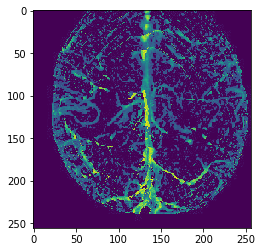

In [22]:
keys = list(data_dir.keys())
print(keys)
arr = data_dir[list(data_dir.keys())[40]]
arr = arr[2,:,:]
print(arr.shape)

tmp_name = 'tmp_img.jpg'
scipy.misc.imsave(tmp_name,arr)
file_jpg = scipy.misc.imread(tmp_name,True,'F')
pyplot.imshow(file_jpg)



In [33]:
def get_labels(data_dir: str):
    patient_ids = {}
    for filename in os.listdir(directory):
        fname = filename[:-4]
#         print(fname)
        if fname[0] == 'N':
            patient_ids[fname] = 0
        else:
            patient_ids[fname] = 1
    return patient_ids



In [34]:
patient_ids = get_labels(directory)
print(patient_ids)

{'N136': 0, 'N16': 0, 'N128': 0, 'N126': 0, 'N163': 0, 'N195': 0, 'N111': 0, 'N122': 0, 'N1': 0, 'N22': 0, 'N161': 0, 'N145': 0, 'N146': 0, 'N156': 0, 'N15': 0, 'N135': 0, 'N106': 0, 'N177': 0, 'N155': 0, 'N190': 0, 'N157': 0, 'N134': 0, 'N142': 0, 'N14': 0, 'N108': 0, 'N104': 0, 'N101': 0, 'N131': 0, 'N168': 0, 'N151': 0, 'N175': 0, 'N239': 0, 'N112': 0, 'N176': 0, 'N119': 0, 'N188': 0, 'N113': 0, 'N20': 0, 'N125': 0, 'N141': 0, 'N187': 0, 'N171': 0, 'N150': 0, 'N100': 0, 'N183': 0, 'N165': 0, 'N172': 0, 'N153': 0, 'N129': 0, 'N194': 0, 'N121': 0, 'N193': 0, 'N139': 0, 'N17': 0, 'N138': 0, 'N114': 0, 'N118': 0, 'N189': 0, 'N103': 0, 'N124': 0, 'N107': 0, 'N10': 0, 'N154': 0, 'N102': 0, 'N164': 0, 'N162': 0, 'N159': 0, 'N110': 0, 'N130': 0, 'N167': 0, 'N166': 0, 'N160': 0, 'N152': 0, 'N185': 0, 'N148': 0, 'N265': 0, 'N115': 0, 'N144': 0, 'N169': 0, 'N147': 0, 'N178': 0, 'N174': 0, 'N173': 0, 'N123': 0, 'N222': 0, 'N179': 0, 'N181': 0, 'N143': 0, 'N120': 0, 'N158': 0, 'N109': 0, 'N182':